# ПРАКТИЧЕСКОЕ ЗАДАНИЕ 4

In [45]:
import plotly.express as px

In [46]:
pip install numpy

In [47]:
import numpy as np

In [48]:
import pandas as pd

In [49]:
import matplotlib.pyplot as plt

In [50]:
import seaborn as sns

In [51]:
df = pd.read_csv('train.csv')

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# Распределение значений признаков

Text(0, 0.5, 'Количество')

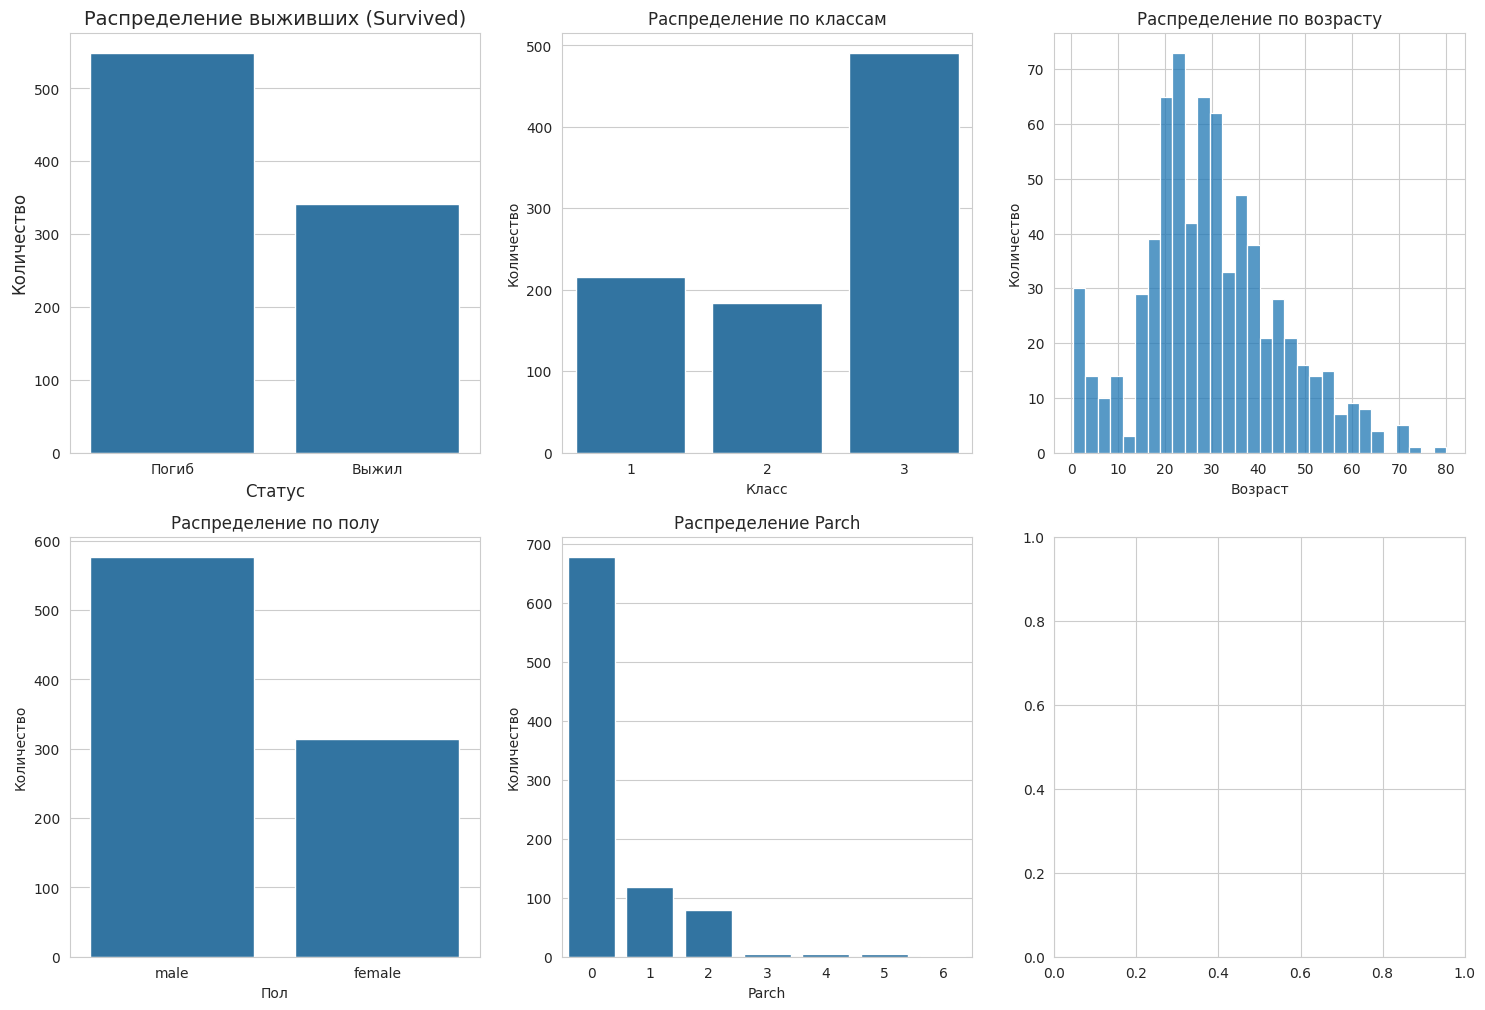

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

ax = sns.countplot(x='Survived', data=df, ax=axes[0, 0])
ax.set_title('Распределение выживших (Survived)', fontsize=14)
ax.set_xlabel('Статус', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Погиб', 'Выжил'])

sns.countplot(x='Pclass', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Распределение по классам')
axes[0, 1].set_xlabel('Класс')
axes[0, 1].set_ylabel('Количество')

sns.histplot(df['Age'].dropna(), bins=30,  ax=axes[0, 2])
axes[0, 2].set_title('Распределение по возрасту')
axes[0, 2].set_xlabel('Возраст')
axes[0, 2].set_ylabel('Количество')

sns.countplot(x='Sex', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Распределение по полу')
axes[1, 0].set_xlabel('Пол')
axes[1, 0].set_ylabel('Количество')

sns.countplot(x='Parch', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Распределение Parch')
axes[1, 1].set_xlabel('Parch')
axes[1, 1].set_ylabel('Количество')

# Возраст

Text(0, 0.5, 'Возраст')

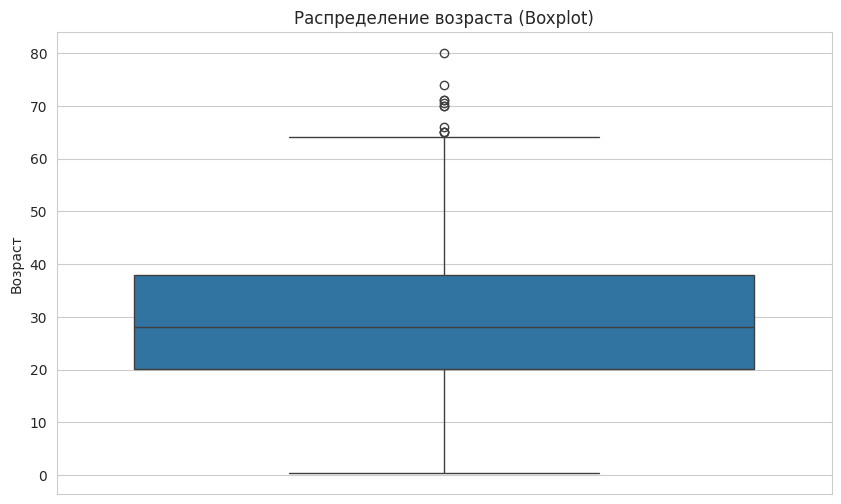

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Age', data=df)
plt.title('Распределение возраста (Boxplot)')
plt.ylabel('Возраст')

# Интерпретация

1. Медиана около 28 лет
2. 25% пассажиров младше 20 лет
3. 75% пассажиров младше 38 лет
4. Выбросы представляют пожилых пассажиров старше 65 лет

# График pie chart

Text(0.5, 1.0, 'Распределение по классам')

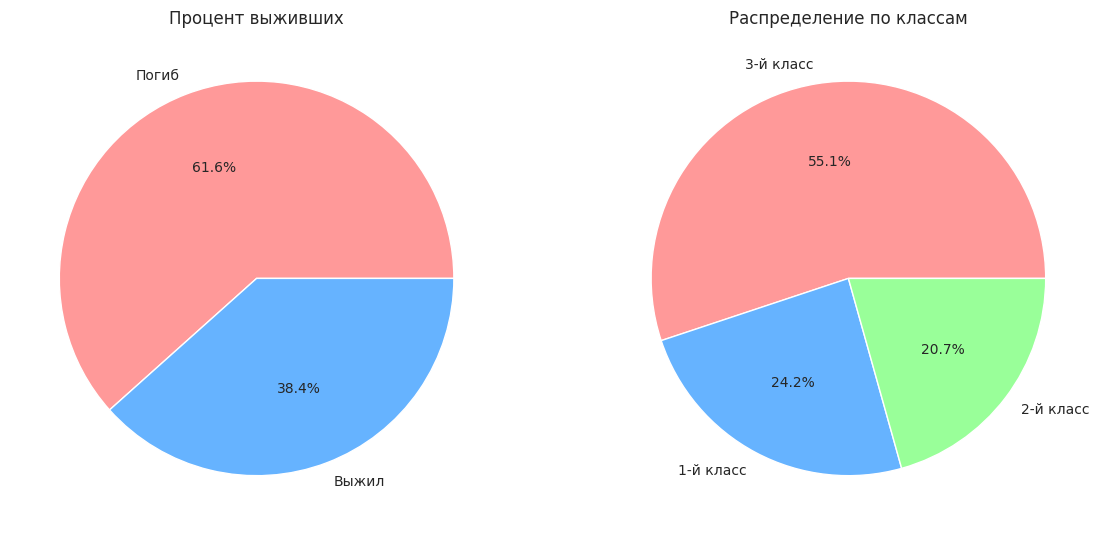

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

survived_counts = df['Survived'].value_counts()
axes[0].pie(survived_counts,
            labels=['Погиб', 'Выжил'],
            autopct='%1.1f%%',
            colors=['#ff9999','#66b3ff'])
axes[0].set_title('Процент выживших')

pclass_counts = df['Pclass'].value_counts()
axes[1].pie(pclass_counts,
            labels=['3-й класс', '1-й класс', '2-й класс'],
            autopct='%1.1f%%',
            colors=['#ff9999','#66b3ff','#99ff99'])
axes[1].set_title('Распределение по классам')

# График типа pairplot

Text(0.5, 1.02, 'Парные распределения числовых признаков')

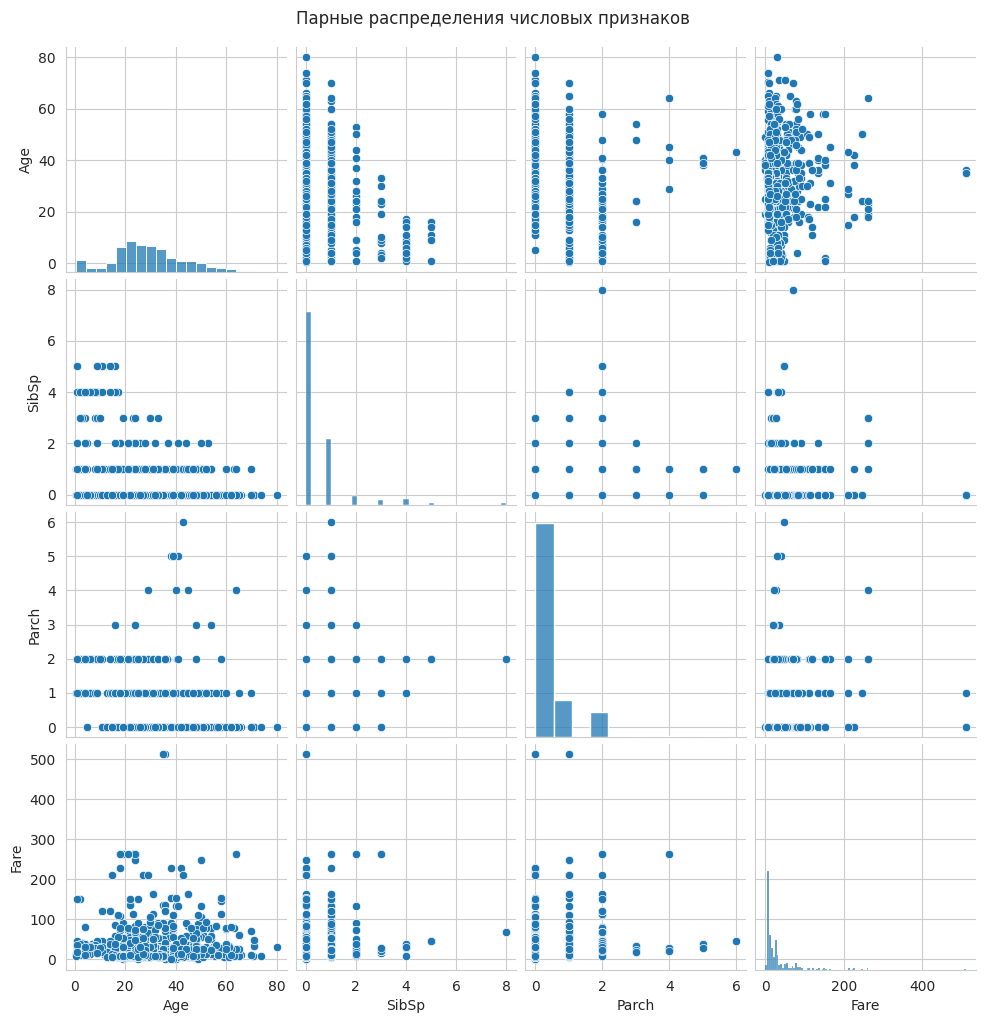

In [56]:
numerical_df = df[['Age', 'SibSp', 'Parch', 'Fare']]
pairplot = sns.pairplot(numerical_df)
pairplot.fig.suptitle('Парные распределения числовых признаков', y=1.02)

# Интерактивный sunburst plot

In [57]:
class_sex_count = df.groupby(['Pclass', 'Sex']).size().reset_index(name='count')
class_sex_count['Pclass'] = class_sex_count['Pclass'].apply(
    lambda x: f'Класс {x}'
)

fig = px.sunburst(
    class_sex_count,
    path=['Pclass', 'Sex'],
    values='count',
    title='Распределение пассажиров по классам и полу'
)
fig.update_traces(textinfo='label+percent parent')